In [7]:
# Regression Tree & Random Forest

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('flats_prep.csv', sep=';')

In [3]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Fitting Tree to the Training set (M2)
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 3:4], y_train)

In [18]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 3:4])

In [19]:
# Coefficient of determination R^2
sdt.score(X_train[:, 3:4], y_train), sdt.score(X_test[:, 3:4], y_test)

(0.8667685081280977, 0.6060283322729998)

In [20]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sdt.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(530043299.6265031, 672889312.7998033)

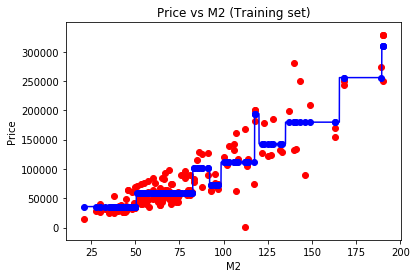

In [21]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

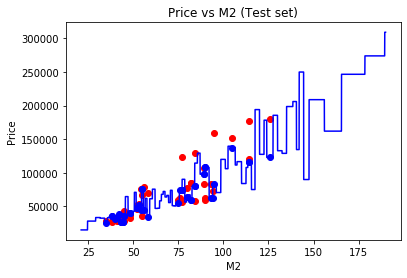

In [9]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [10]:
# Fitting Tree to the Training set 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [11]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [22]:
# Coefficient of determination R^2
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9921189919121658, 0.7390017339788906)

In [12]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(31353514.642581895, 543174715.4936868)

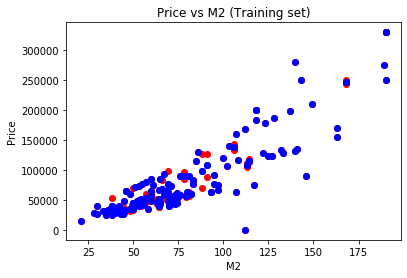

In [28]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], dt.predict(X_train), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

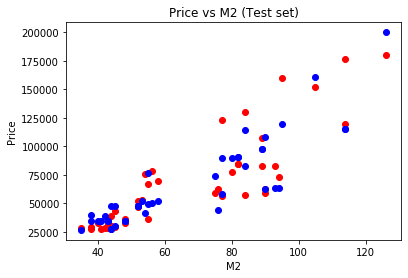

In [19]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], dt.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [13]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0).fit(X_train, y_train)

In [14]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [31]:
# Coefficient of determination R^2
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9629307850743382, 0.7069710407747708)

In [15]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(147474810.3297757, 500482829.49153024)

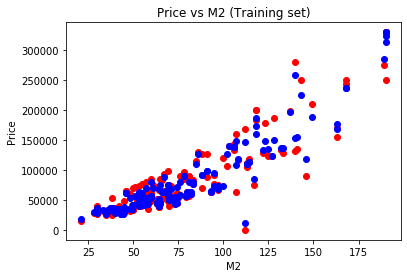

In [32]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], rf.predict(X_train), 'bo')
plt.title('Price vs M2 (Training set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

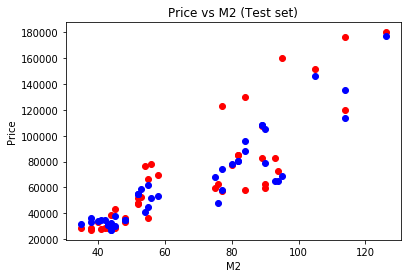

In [33]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], rf.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()